In [ ]:
!pip install pandas matplotlib seaborn plotly nltk wordcloud scikit-learn


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df, palette={'positive': 'green', 'negative': 'blue', 'neutral': 'gray'})
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [8]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [9]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [10]:

df['word count'] = df['review'].apply(no_of_words)

In [11]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


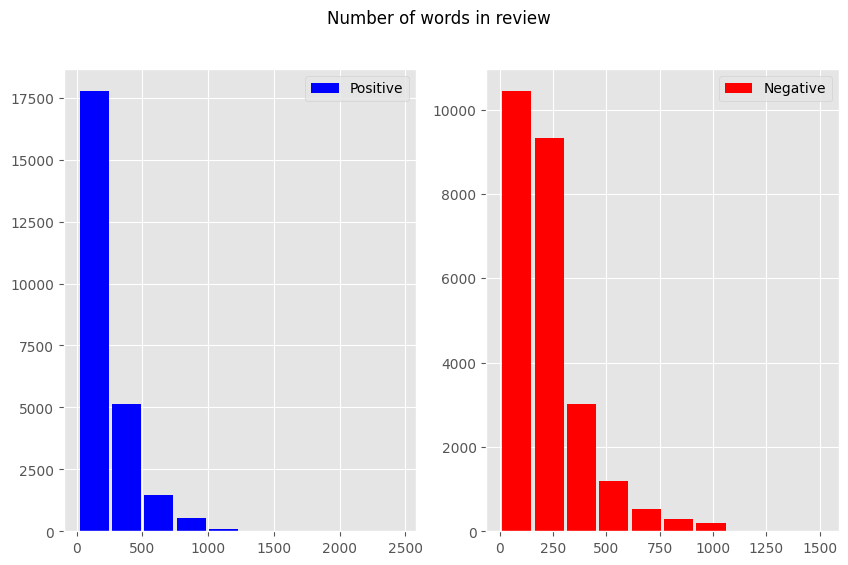

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

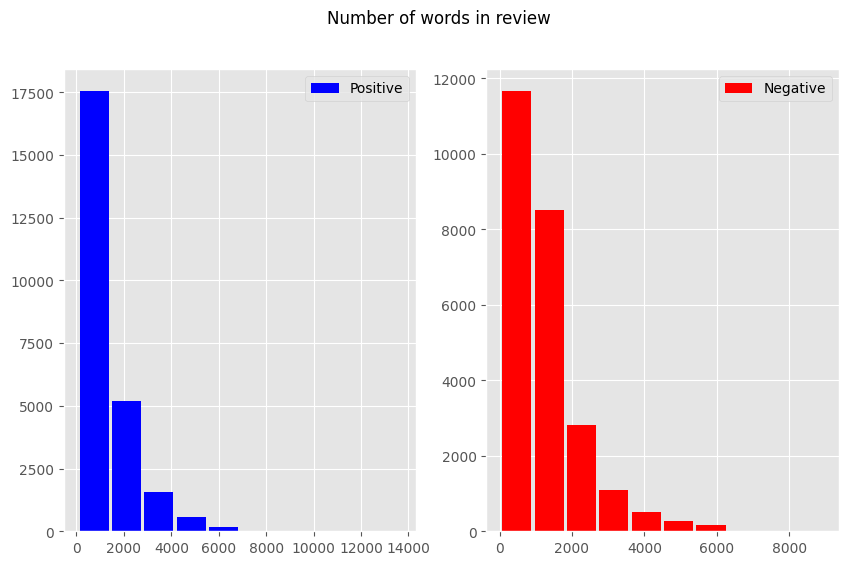

In [13]:
# length of positive and negative
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()

In [ ]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

In [15]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [16]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
nltk.download('punkt', download_dir='C:/nltk_data')



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

In [ ]:
import nltk
nltk.download('punkt')


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Set of common English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    
    # Handle negations by combining with the next word
    text = re.sub(r'\b(not|never|no)\s+(\w+)', r'\1_\2', text)
    
    # Remove all non-alphabetic characters except underscores (for negations)
    text = re.sub(r"[^a-z_]", " ", text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    
    return ' '.join(words)

# ✅ Test it
print(preprocess_text("This is a sample movie review. I liked it very much!"))


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Set of common English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    
    # Handle negations by combining with the next word
    text = re.sub(r'\b(not|never|no)\s+(\w+)', r'\1_\2', text)
    
    # Remove all non-alphabetic characters except underscores (for negations)
    text = re.sub(r"[^a-z_]", " ", text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    
    return ' '.join(words)

# ✅ Test it
print(preprocess_text("This is a sample movie review. I liked it very much!"))


In [22]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  418


In [23]:
df = df.drop_duplicates('review')

In [24]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [25]:
df.review = df['review'].apply(lambda x: stemming(x))

In [26]:

df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [27]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
5,"Probably my all-time favorite movie, a story o...",1,119


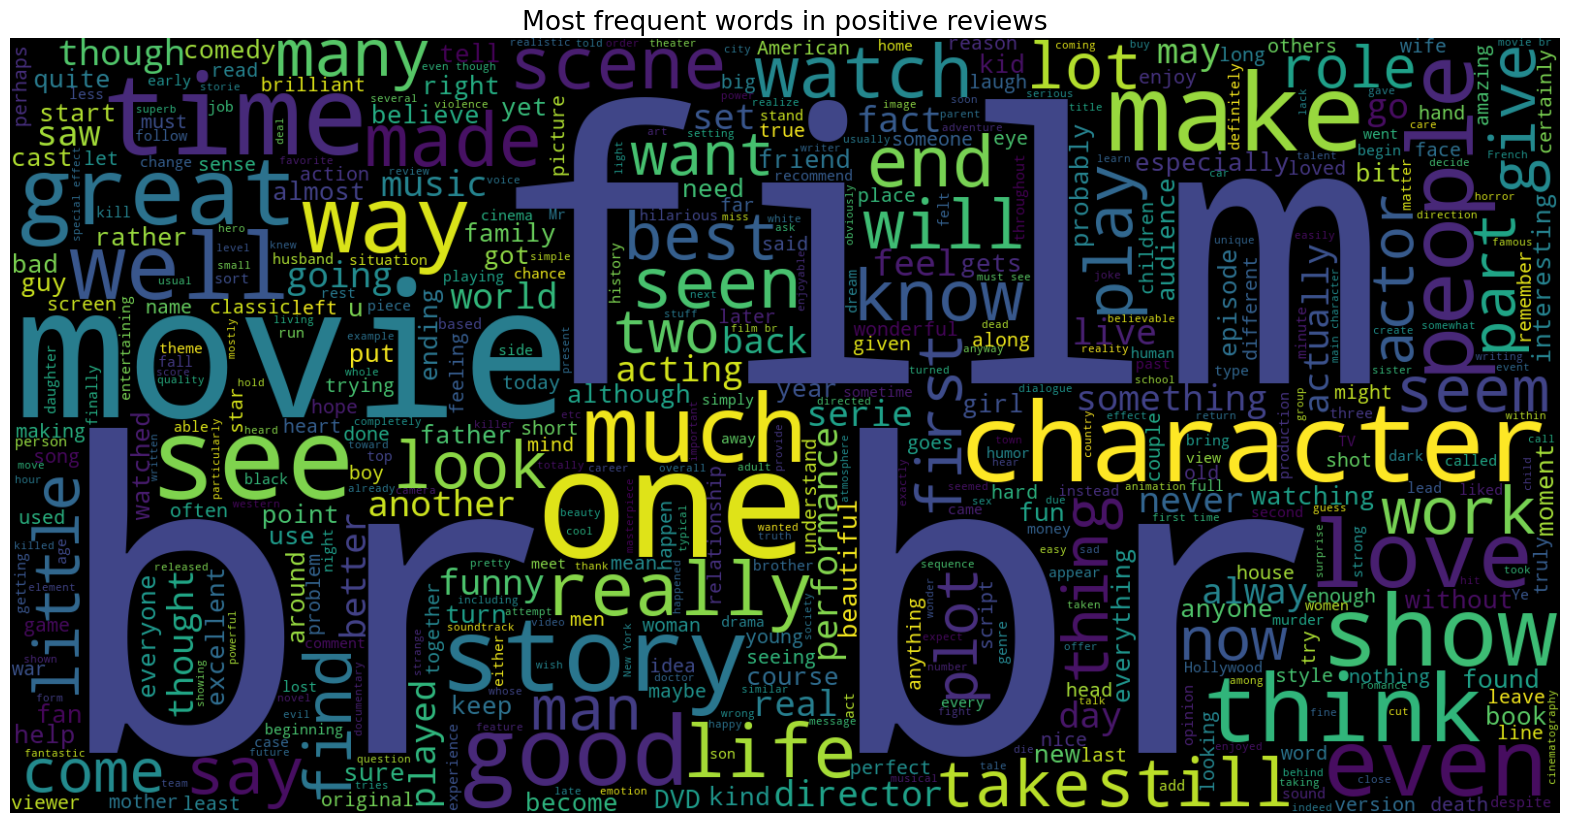

In [28]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [ ]:
import nltk
nltk.download('punkt')


In [ ]:
import nltk
from collections import Counter
import re

# Ensure punkt is downloaded
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stopwords for filtering
stop_words = set(stopwords.words('english'))

# Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    
    # Handle negations by combining with the next word
    text = re.sub(r'\b(not|never|no)\s+(\w+)', r'\1_\2', text)
    
    # Remove all non-alphabetic characters except underscores (for negations)
    text = re.sub(r"[^a-z_]", " ", text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    
    return ' '.join(words)

# Assuming pos_reviews is already defined as a DataFrame
count = Counter()

# Apply preprocessing before counting
for text in pos_reviews['review'].values:
    processed_text = preprocess_text(text)
    for word in processed_text.split():
        count[word] += 1

# Show top 15 most common words
print(count.most_common(15))



In [32]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,br,97604
1,film,41952
2,movie,37626
3,one,26277
4,like,17356


In [ ]:
pip install --upgrade nbformat


In [34]:
import plotly.express as px

# Example DataFrame (assuming `pos_words` is a DataFrame with 'word' and 'count' columns)
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')


In [35]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,Basically there's a family where a little boy ...,2,138
7,"This show was an amazing, fresh & innovative i...",2,174
8,Encouraged by the positive comments about this...,2,130
10,Phil the Alien is one of those quirky films wh...,2,96
11,I saw this movie when I was about 12 when it c...,2,180


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

# Basic set of common English stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    # Handle negations by combining with the next word
    text = re.sub(r'\b(not|never|no)\s+(\w+)', r'\1_\2', text)
    # Remove all non-alphabetic characters except underscores (for negations)
    text = re.sub(r"[^a-z_]", " ", text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

#  Apply preprocessing to negative reviews
neg_reviews['cleaned'] = neg_reviews['review'].apply(preprocess_text)

#  Join cleaned text
text = ' '.join(neg_reviews['cleaned'].dropna())

# Generate WordCloud
plt.figure(figsize=(20, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, random_state=42).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews', fontsize=19)
plt.show()


In [37]:
# Load your dataset
df = pd.read_csv("IMDB Dataset.csv")  # Replace with actual file

# Filter for negative sentiment reviews
neg_reviews = df[df['sentiment'] == 'negative'].copy()

# Ensure 'review' column exists
print(neg_reviews.columns)


Index(['review', 'sentiment'], dtype='object')


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Ensure nltk data is available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaning and lemmatization function
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned)

# Load data
df = pd.read_csv("IMDB Dataset.csv")  # Replace with your actual path

# Check column names
print("Available columns:", df.columns)

# If 'Sentiment' column doesn't exist, create it with simple rule (for testing)
if 'Sentiment' not in df.columns:
    df['Sentiment'] = df['sentiment'] if 'sentiment' in df.columns else (
        df['review'].apply(lambda x: 'Positive' if 'good' in x.lower() else 'Negative')
    )

# Filter negative reviews
neg_reviews = df[df['Sentiment'] == 'Negative'].copy()

# Apply cleaning
neg_reviews['cleaned'] = neg_reviews['review'].apply(clean_text)

# Count most frequent words
word_count = Counter()
for review in neg_reviews['cleaned']:
    word_count.update(review.split())

# Display top 15 most common words
print("Top 15 common words in negative reviews:")
for word, freq in word_count.most_common(15):
    print(f"{word}: {freq}")


In [39]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,br,97604
1,film,41952
2,movie,37626
3,one,26277
4,like,17356


In [40]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [41]:
X = df['review']
Y = df['sentiment']

In [42]:

vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [43]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [44]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (35000, 101895)
Size of y_train:  (35000,)
Size of x_test:  (15000, 101895)
Size of y_test:  (15000,)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [46]:

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.99%


In [47]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6592  819]
 [ 683 6906]]


              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7411
    positive       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [48]:

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.03%


In [49]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6624  787]
 [1308 6281]]


              precision    recall  f1-score   support

    negative       0.84      0.89      0.86      7411
    positive       0.89      0.83      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [50]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 90.11%


In [51]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6626  785]
 [ 699 6890]]


              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      7411
    positive       0.90      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.1s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.2s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.877 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.873 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.879 total time=   0.1s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.2s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.3s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.897 total time=   0.5s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [53]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.90
best parameters:  {'C': 1, 'loss': 'hinge'}


In [54]:

svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 90.16%


In [55]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6628  783]
 [ 693 6896]]


              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7411
    positive       0.90      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [ ]:
!pip install torch transformers pandas

In [ ]:
pip install huggingface_hub[hf_xet]

In [ ]:
pip install --upgrade transformers


In [ ]:
!pip install -U "accelerate>=0.26.0"

In [76]:
import transformers
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from torch.cuda.amp import GradScaler, autocast
import pandas as pd
from tqdm import tqdm

In [77]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [78]:
file_path = 'IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [79]:
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [80]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [81]:
# Dataset Class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [82]:
dataset = SentimentDataset(df['review'].tolist(), df['label'].tolist(), tokenizer)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [83]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [84]:
optimizer = AdamW(model.parameters(), lr=2e-5)
scaler = GradScaler()


In [85]:

# Set model to training mode
model.train()
epochs = 2
accumulation_steps = 4 # Adjust this based on your GPU memory

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    loop = tqdm(loader, leave=True)
    

    for batch_idx, batch in enumerate(loop):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

    with autocast():  # Mixed precision training
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss / accumulation_steps  # Divide loss for gradient accumulation

    scaler.scale(loss).backward()

    # Gradient accumulation
    if (batch_idx + 1) % accumulation_steps == 0:
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()

    loop.set_description(f"Epoch {epoch+1}")
    loop.set_postfix(loss=loss.item())

# Save the Model
model.save_pretrained('./sentiment-bert')
tokenizer.save_pretrained('./sentiment-bert')

print("Training complete and model saved.")

Epoch 1/2


100%|██████████| 12500/12500 [06:50<00:00, 30.48it/s]


Epoch 2/2


100%|██████████| 12500/12500 [06:21<00:00, 32.81it/s]


Training complete and model saved.


In [75]:
model.save_pretrained('./sentiment-bert')
tokenizer.save_pretrained('./sentiment-bert')

('./sentiment-bert\\tokenizer_config.json',
 './sentiment-bert\\special_tokens_map.json',
 './sentiment-bert\\vocab.txt',
 './sentiment-bert\\added_tokens.json')